In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import  DecisionTreeClassifier,plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn.model_selection import ParameterGrid, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, classification_report


In [ ]:
# import data
data = pd.read_csv('https://raw.githubusercontent.com/abhishekgd96/Decision-Tree/main/Company_Data.csv')
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [ ]:
data.info() # data has no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


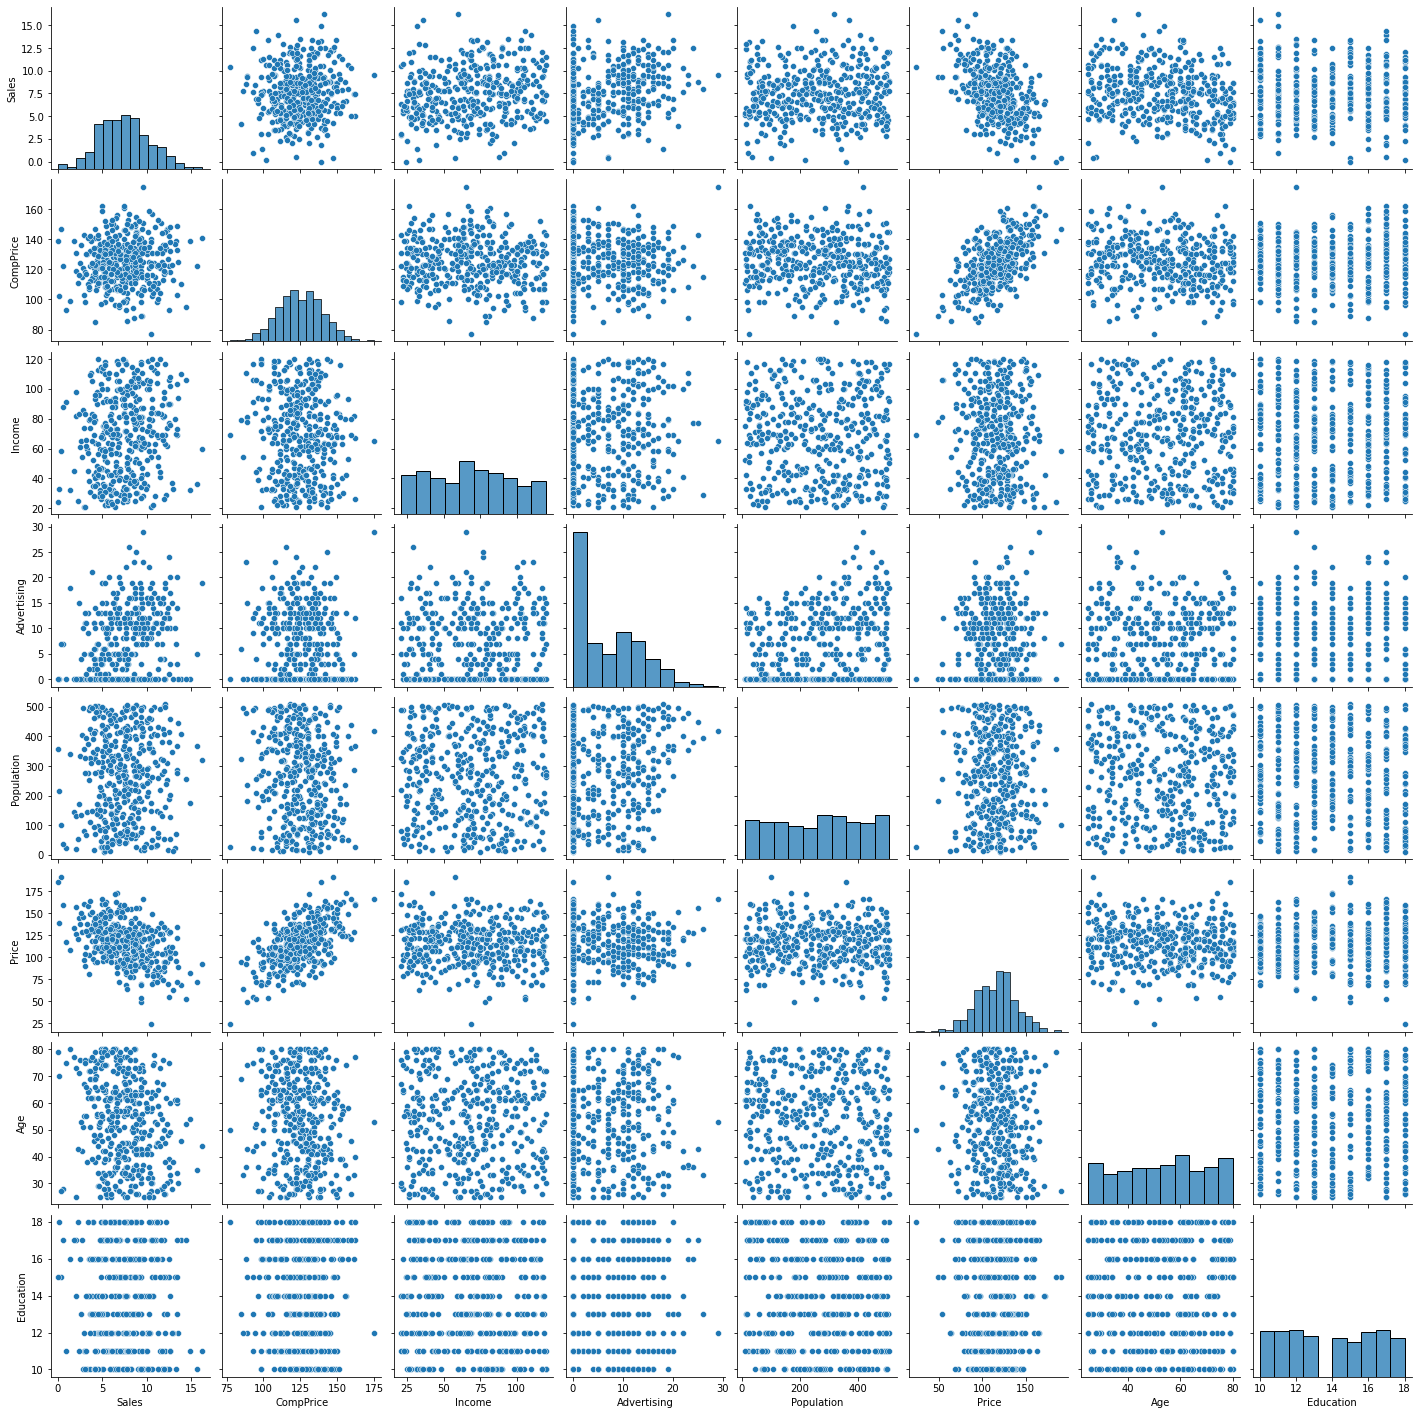

In [ ]:
sns.pairplot(data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


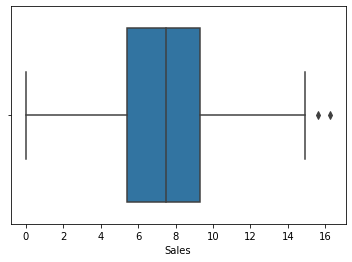

In [ ]:
sns.boxplot(data.Sales)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


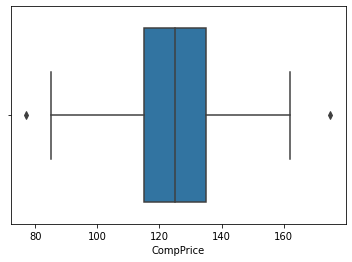

In [ ]:
sns.boxplot(data.CompPrice)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


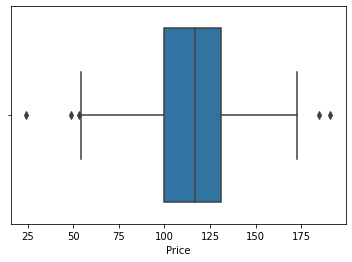

In [ ]:
sns.boxplot(data.Price)

In [ ]:
#It is clear that some of columns have continous data, we need to convert them in categorical. And can also remove outliers if required

In [ ]:
label_encoder = preprocessing.LabelEncoder()

In [ ]:
data['ShelveLoc']= label_encoder.fit_transform(data['ShelveLoc'])
data['Urban']= label_encoder.fit_transform(data['Urban'])
data['US']= label_encoder.fit_transform(data['US'])
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [ ]:
#Selecting our Features and Target variables
#After looking at the problem statement it can be deduced that Sales is our target

In [ ]:
Y=data['Sales']
X=data.iloc[:,1:11]
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [ ]:
# array = data.values
x = X.values
y = Y.values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

In [ ]:
#We have continous data in our Target column, so we will go ahead with DecisionTreeRegressor().

In [ ]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
#Find the accuracy
model.score(x_test,y_test)

0.22736725673113045

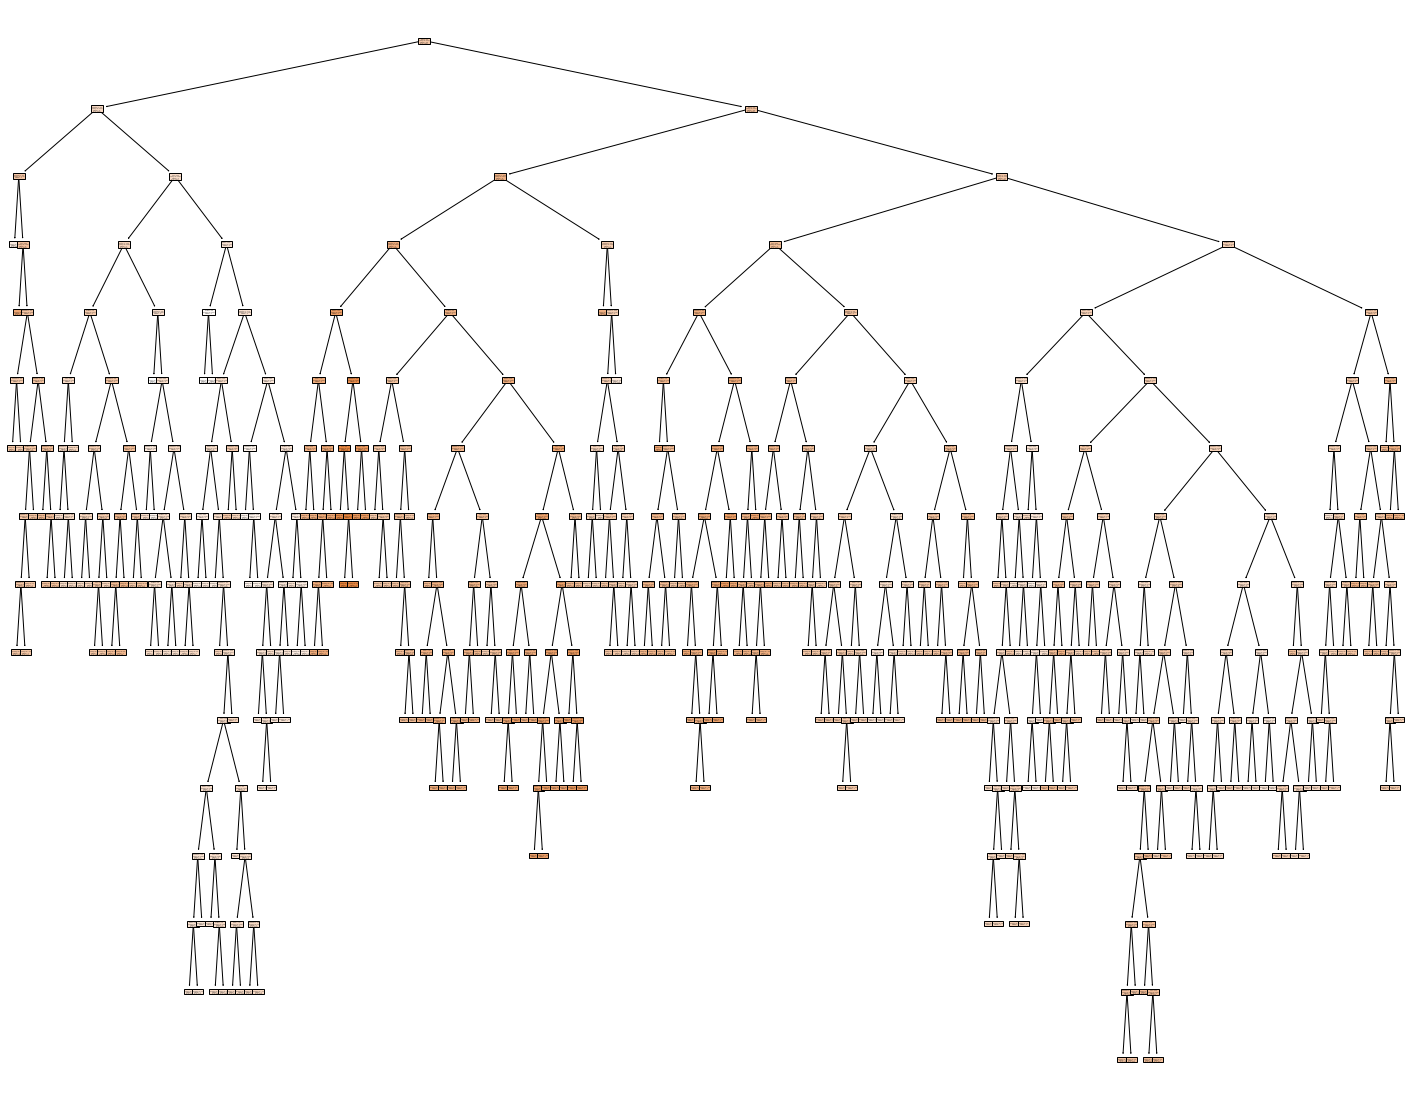

In [ ]:
fn=['Sales','CompPrice','Income' ,'Advertising' ,'Population' ,'Price' ,'Age' ,'Education' ,'Urban','US']
cn =['Bad','Good','Medium']

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, feature_names=fn, filled=True)

In [ ]:
#Accuracy for base model is very low as well as depth of the decision tree is also very high, let us try Hyperparameter tuning.

In [ ]:
parameters = {'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
          'splitter' : ['best', 'random'],
          'max_depth' : [1,2,3,4,5,6,7,8,9,10,11,12,13,14],
          'max_features' : ['sqrt','log2','auto']}

In [ ]:
model = DecisionTreeRegressor()
grid = GridSearchCV(estimator = model, param_grid = parameters)
grid.fit(X, Y)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14],
                         'max_features': ['sqrt', 'log2', 'auto'],
                         'splitter': ['best', 'random']})

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

0.4299251438246124
{'criterion': 'squared_error', 'max_depth': 8, 'max_features': 'auto', 'splitter': 'random'}


In [ ]:
#applying best param.
model = DecisionTreeRegressor(criterion='absolute_error', max_depth = 7, max_features = 'auto', splitter = 'best')
model.fit(x_train, y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=7,
                      max_features='auto')

In [ ]:
#Find the accuracy
model.score(x_test,y_test)

0.30359651714379365

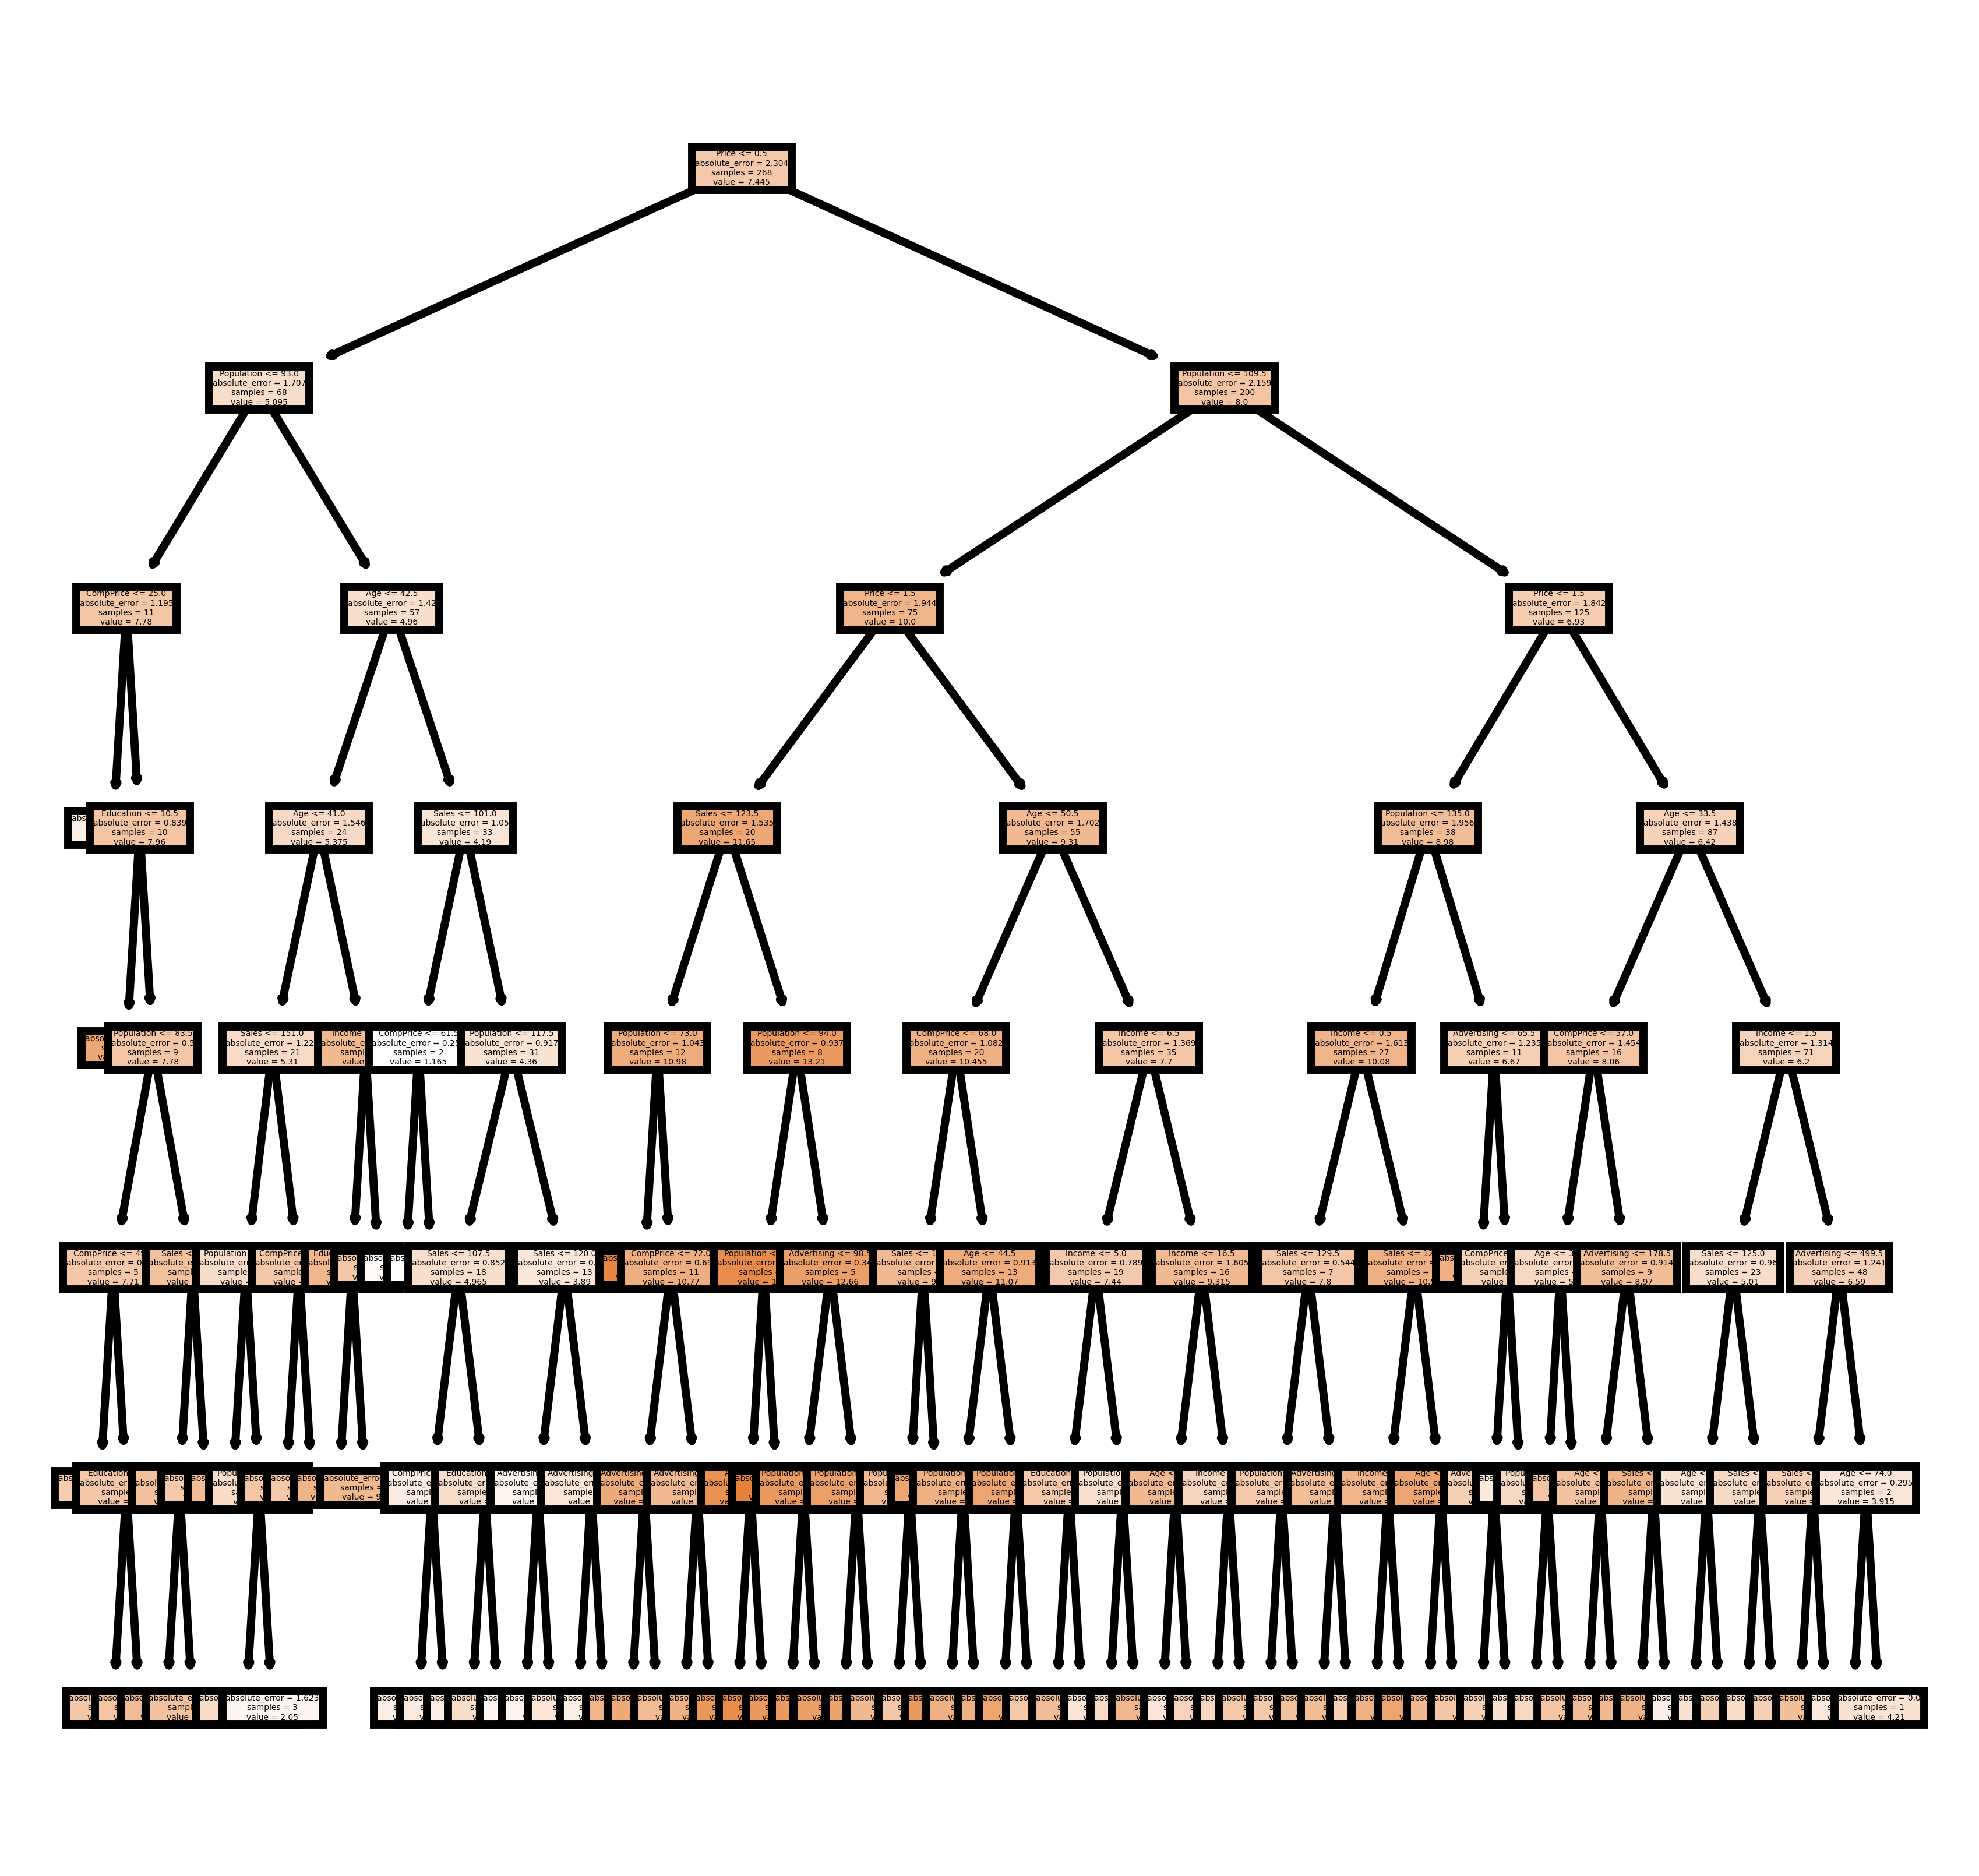

In [ ]:
plt.figure(figsize=(4, 4), dpi=1000)
plot_tree(
    model,
    feature_names=fn,
    class_names=cn,
    filled=True,
)
plt.show()

In [ ]:
#As the decision tree regressor is providing us with substandard accuracy we can try XGBoost or ADABoost or other complex algorithms on this dataset.
#We can also use pruning to further better model.